In this modern times where every business is highly dependent on its data to make better decisions for developing business, time series analysis plays an important role in helping different business entities to get an idea about how good their sales are by implementing sales forecating on the historic data. 



Time series are a collection of **time-dependent data points**. That means that each data point is assigned to a specific timestamp. Ideally, these data points are in chronological order and in contant time intervals (e.g. every minute or everyday). The time series forecasting problem **analyzes patterns in the past data to make predictions about the future**. In contrast to regression problems, time series are time-dependent and show specific characteristics, such as **trend and seasonality.**

# Sales Forecasting 

## 1. EDA 

In [1]:
#import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker
from datetime import datetime, date 

In [2]:
df = pd.read_csv('../input/sales-forecasting/train.csv') #Read the dataset

**Let's take a look at the dataset:**

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.describe() #Describing the data of numerical values

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [5]:
df.drop('Row ID',axis = 1, inplace = True) #Dropping the Row ID column
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') #convert Order dates to pandas datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   #convert shipping dates to pandas datetime format

The data should be in chronological order and the timestamps should be equidistant in time series. Equidisant timestamps indicates constant time intervals. 

In [6]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [7]:
#setting the index to be the date 
df.set_index("Order Date", inplace = True)

**Checking the missing values:**

In [8]:
print(df.isnull().sum())

Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


<b>To handle the null values in postal code, we will not drop them. Instead, we will add the postal code of respective city:<br>
1. We need to find the cities for which the postal code is not mentioned. 
2. Fill the postal code of the respective city into the postal code column.</b>

In [9]:
df[df['Postal Code'].isnull()]

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2016-11-07,CA-2016-162887,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
2016-11-08,CA-2016-117086,2016-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
2017-04-06,US-2017-150140,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28


**We can see that the postal code is not mentioned for Burlington city in Vermont state. So, we need to fill the postal code of that city:**

In [10]:
df['Postal Code'] = df['Postal Code'].fillna(5401) # Postal code for Burlington city

In [11]:
print(df.isnull().sum())

Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


**<h3>Let's find out who are the Most Valuable customers!</h3>**

The Most Valuable Customers are the customers who are the most profitable for a company. <br>
These customers buy more or higher-value products than the average customer.

In [12]:
Top_customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the Customers as per the sales
Top_customers = Top_customers[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_customers.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the customer name into dataframe 

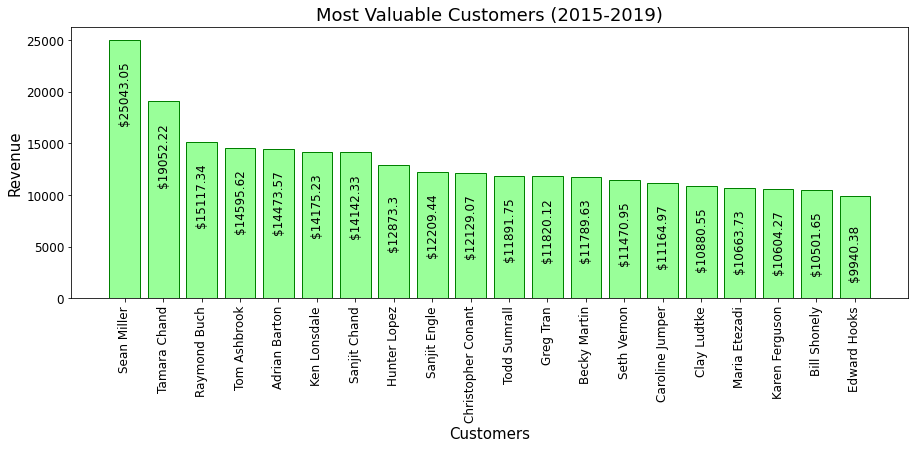

In [13]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("Most Valuable Customers (2015-2019)", fontsize=18) 
plt.bar(Top_customers["Customer Name"], Top_customers["Sales"],color= '#99ff99',edgecolor='green', linewidth = 1)
plt.xlabel("Customers",fontsize=15) # x axis shows the customers 
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_customers["Sales"].items(): #To show the exact revenue generated on the figure
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

**<h3>Let's find out which states generated the highest revenue!</h3>**

Here are the Top 10 States which generated the highest revenue

In [14]:
Top_states = df.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the States as per the sales
Top_states = Top_states[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_states.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the states into dataframe

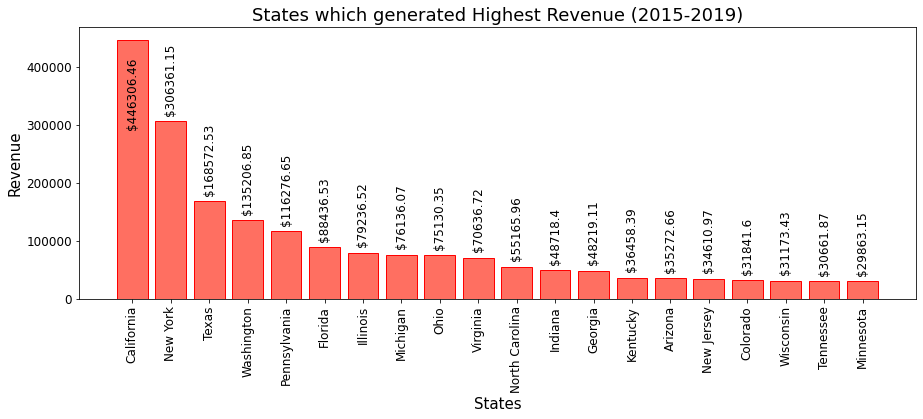

In [15]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("States which generated Highest Revenue (2015-2019)", fontsize=18) 
plt.bar(Top_states["State"], Top_states["Sales"],color= '#FF6F61',edgecolor='Red', linewidth = 1)
plt.xlabel("States",fontsize=15) # x axis shows the States
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_states["Sales"].items(): #To show the exact revenue generated on the figure
    if v>400000:
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

**<h3>Let's find out which cities generated highest revenue!</h3>**

Here are the top 10 cities which generated the highest revenue

In [16]:
Top_cities = df.groupby(["City"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the States as per the sales
Top_cities = Top_cities[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_cities.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the cities into the dataframe

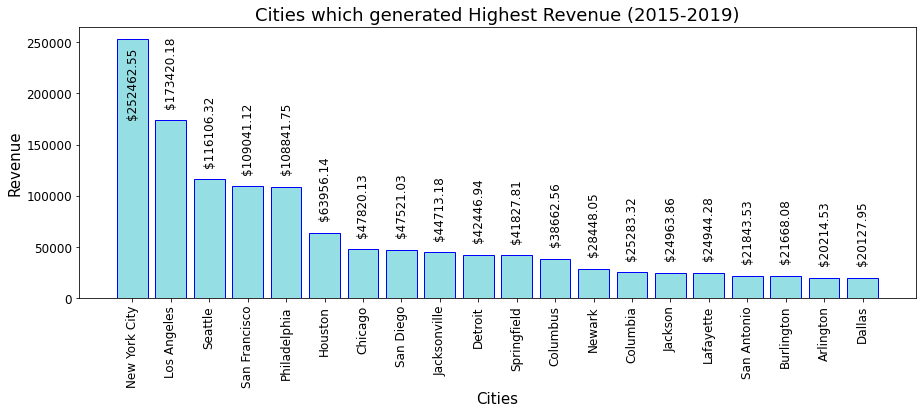

In [17]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("Cities which generated Highest Revenue (2015-2019)", fontsize=18)
plt.bar(Top_cities["City"], Top_cities["Sales"],color= '#95DEE3',edgecolor='blue', linewidth = 1)
plt.xlabel("Cities",fontsize=15)  # x axis shows the States
plt.ylabel("Revenue",fontsize=15)  # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_cities["Sales"].items(): #To show the exact revenue generated on the figure
    if v>250000:
        plt.text(k,v-75000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

**<h3>Let's look at the revenue generated by each category!</h3>**

In [18]:
Top_category = df.groupby(["Category"]).sum().sort_values("Sales", ascending=False)  # Sort the Categories as per the sales
Top_category = Top_category[["Sales"]] # keep only the sales column in the dataframe
total_revenue_category = Top_category["Sales"].sum() # To find the total revenue generated as per category
total_revenue_category = str(int(total_revenue_category)) # Convert the total_revenue_category from float to int and then to string
total_revenue_category = '$' + total_revenue_category # Adding '$' sign before the Value
Top_category.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the category into the dataframe

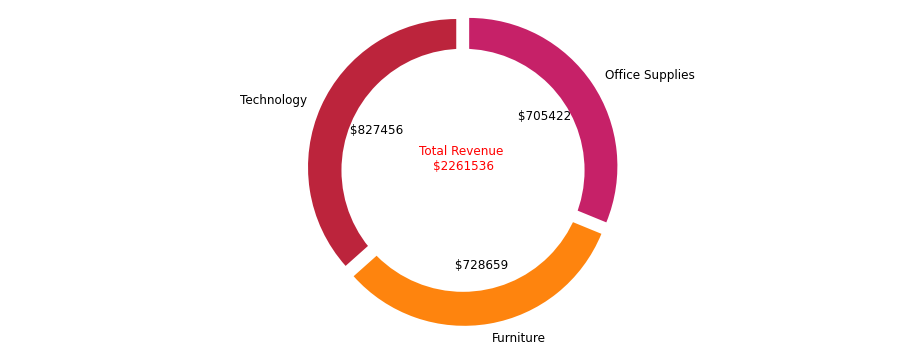

In [19]:
plt.rcParams["figure.figsize"] = (13,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined
plt.rcParams['font.weight'] = 6 # Font weight is defined
# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the categories.
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format
colors = ['#BC243C','#FE840E','#C62168'] # Colors are defined for the pie chart
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_category['Sales'], colors = colors, labels=Top_category['Category'], autopct= autopct_format(Top_category['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white') # drawing a circle on the pie chart to make it look better 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) # Add the circle on the pie chart
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
# we can look the total revenue generated by all the categories at the center
label = ax1.annotate('Total Revenue \n'+str(total_revenue_category),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

We can see that <i><b>Category - Technology</b></i> generated the highest revenue of about <b>$827426!</b><br>

The <b>Total Revenue</b> generated by all the categories - <b>$2261536!</b>

**<h3> Which products contributed most to the revenue? </h3>**

In [20]:
Top_products = df.groupby(["Product Name"]).sum().sort_values("Sales",ascending=False).head(8) # Sort the product names as per the sales
Top_products = Top_products[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_products.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the product names into the dataframe
total_revenue_products = Top_products["Sales"].sum() # To find the total revenue generated by all the top products
total_revenue_products = str(int(total_revenue_products)) # Convert the total_revenue_products from float to int and then to string
total_revenue_products = '$' + total_revenue_products # Adding '$' sign before the Value

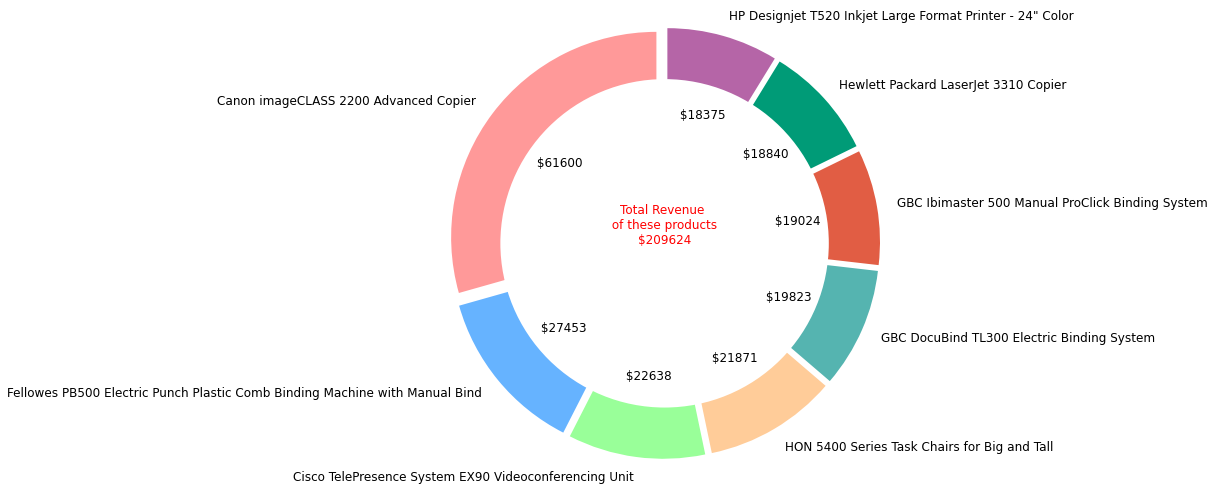

In [21]:
plt.rcParams["figure.figsize"] = (13,7) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined for the figure
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77','#B565A7'] # colors are defined for the pie chart
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_products['Sales'], colors = colors, labels=Top_products['Product Name'], autopct= autopct_format(Top_products['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.80,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
label = ax1.annotate('Total Revenue \n of these products \n'+str(total_revenue_products),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

We can see that <i><b>Product - Canon imageCLASS 2200 Advanced Copier</b></i> generated the highest revenue of about <b>$61600!</b><br>

The <b>Total Revenue</b> generated by all these products - <b>$209624!</b>

<h3><b>Let's look at the revenue generated by each Sub-Category!<h3****>

In [26]:
# Sort both category and  sub category as per the sales
Top_subcat = df.groupby(['Category','Sub-Category']).sum().sort_values("Sales", ascending=False).head(10)
Top_subcat = Top_subcat[["Sales"]].astype(int) # Cast Sales column to integer data type
Top_subcat = Top_subcat.sort_values("Category") # Sort the values as per Category
Top_subcat.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add both columns into data frame
Top_subcat_1 = Top_subcat.groupby(['Category']).sum() # Calculated the total Sales of all the categories
Top_subcat_1.reset_index(inplace=True) # Reset the index

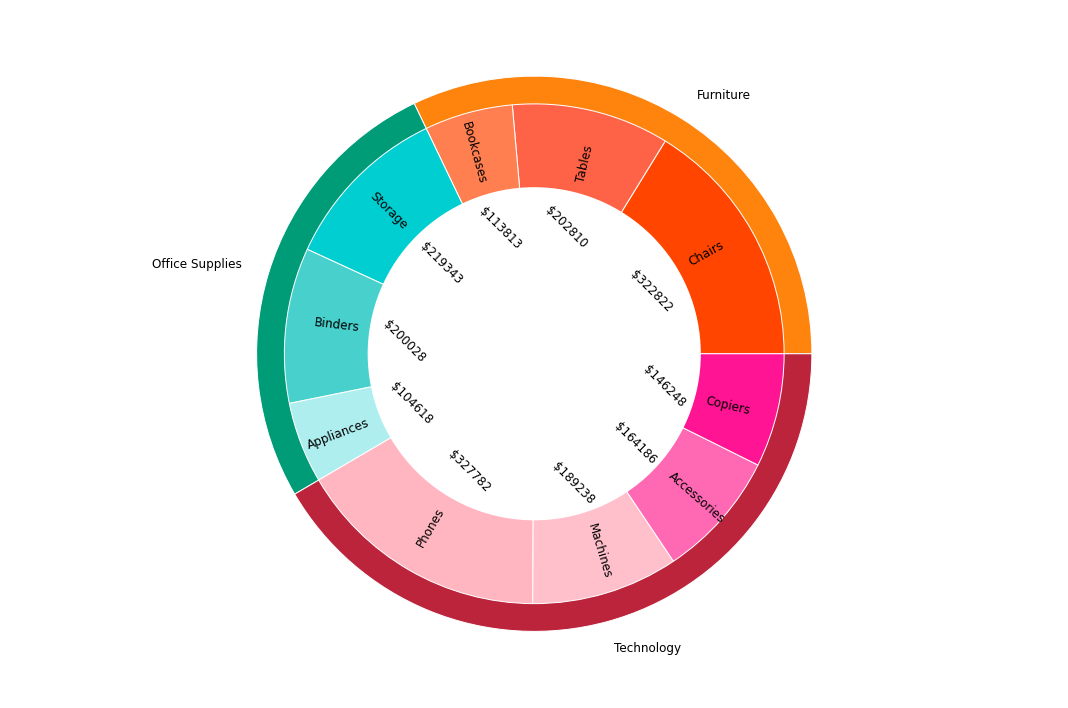

In [27]:
plt.rcParams["figure.figsize"] = (15,10) # width and height of figure is defined in inches
fig, ax = plt.subplots()
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
width = 0.1
outer_colors = ['#FE840E','#009B77','#BC243C'] # Outer colors of the pie chart
inner_colors = ['Orangered','tomato','coral',"darkturquoise","mediumturquoise","paleturquoise","lightpink","pink","hotpink","deeppink"] # inner colors of the pie chart
pie = ax.pie(Top_subcat_1['Sales'], radius=1, labels=Top_subcat_1['Category'],colors=outer_colors,wedgeprops=dict(edgecolor='w'))
pie2 = ax.pie(Top_subcat['Sales'], radius=1-width, labels=Top_subcat['Sub-Category'],autopct= autopct_format(Top_subcat['Sales']),labeldistance=0.7,colors=inner_colors,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,rotatelabels =True)
# Rotate fractions
# [0] = wedges, [1] = labels, [2] = fractions
fraction_text_list = pie2[2]
for text in fraction_text_list: 
    text.set_rotation(315) # rotate the autopct values
centre_circle = plt.Circle((0,0),0.6,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

We can see that <i><b>Sub-Category - Phones</b></i> generated the highest revenue of about <b>$327782!</b><br>

<h3><b>Which Segment has the highest sales?</h3>

In [28]:
Top_segment = df.groupby(["Segment"]).sum().sort_values("Sales", ascending=False) # Sort the segment as per the sales
Top_segment = Top_segment[["Sales"]] # keep only the sales column in the dataframe
Top_segment.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the segment column into the data frame
total_revenue_segement = Top_segment["Sales"].sum() # To find the total revenue generated as per segment
total_revenue_segement = str(int(total_revenue_segement)) # Convert the total_revenue_segment from float to int and then to string
total_revenue_segement= '$' + total_revenue_segement # Adding '$' sign before the Value

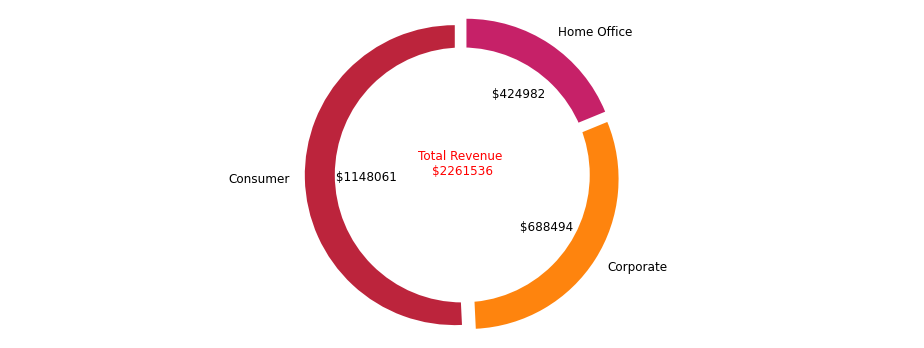

In [29]:
plt.rcParams["figure.figsize"] = (13,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined
plt.rcParams['font.weight'] = 6 # Font weight is defined
colors = ['#BC243C','#FE840E','#C62168'] # Colors are defined for the pie chart
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_segment['Sales'], colors = colors, labels=Top_segment['Segment'], autopct= autopct_format(Top_segment['Sales']),startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.85,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n'+str(total_revenue_segement),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

We can see that <i><b>Segment - Consumer</b></i> generated the highest revenue of about <b>$1148061!</b><br>

The <b>Total Revenue</b> generated by all the segments - <b>$209624!</b>

<h3><b>Which Region has the highest sales?</h3>


In [30]:
Top_region = df.groupby(["Region"]).sum().sort_values("Sales", ascending=False) # Sort the Region as per the sales
Top_region = Top_region[["Sales"]].astype(int) # Cast Sales column to integer data type
Top_region.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the Region column into the data frame

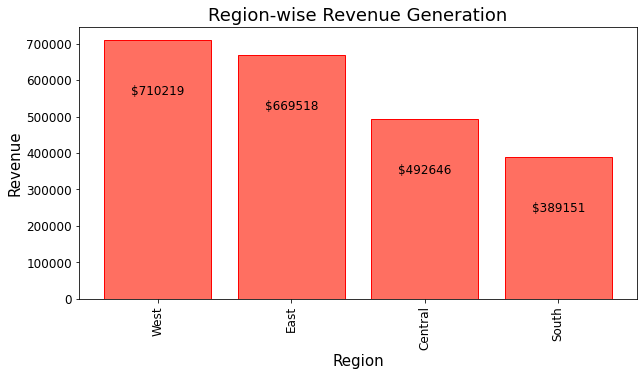

In [31]:
plt.figure(figsize = (10,5)) # width and height of figure is defined in inches
plt.title("Region-wise Revenue Generation", fontsize=18)
plt.bar(Top_region["Region"], Top_region["Sales"],color= '#FF6F61',edgecolor='Red', linewidth = 1)
plt.xlabel("Region",fontsize=15) # x axis shows the Region 
plt.ylabel("Revenue",fontsize=15) # y axis show the Revenue generated
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_region["Sales"].items(): #To show the exact revenue generated on the figure
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,color='k', horizontalalignment='center');

<h3>Which shipping mode has the highest sales?</h3>

In [32]:
Top_shipping = df.groupby(["Ship Mode"]).sum().sort_values("Sales", ascending=False) # Sort the Shipping modes as per the sales
Top_shipping = Top_shipping[["Sales"]] # keep only the sales column in the dataframe
Top_shipping.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the Ship Mode column into the data frame
total_revenue_ship = Top_segment["Sales"].sum() # To find the total revenue generated as per shipping mode
total_revenue_ship = str(int(total_revenue_ship)) # Convert the total_revenue_ship from float to int and then to string
total_revenue_ship = '$' + total_revenue_ship # Adding '$' sign before the Value

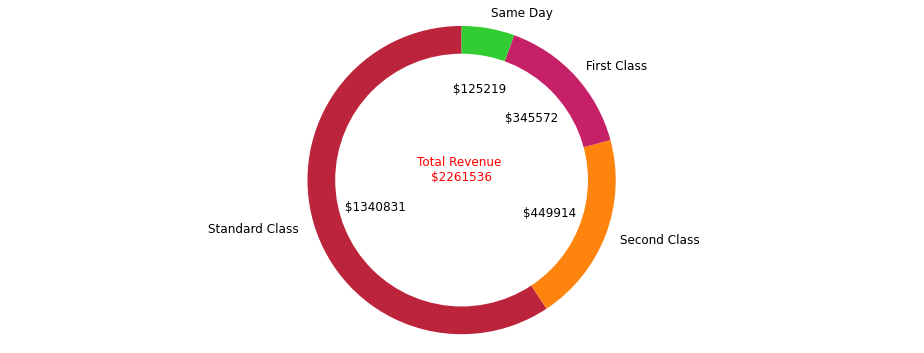

In [33]:
plt.rcParams["figure.figsize"] = (13,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined
plt.rcParams['font.weight'] = 6 # Font weight is defined
colors = ['#BC243C','#FE840E','#C62168',"limegreen"] # define colors for the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(Top_shipping['Sales'], colors = colors, labels=Top_shipping['Ship Mode'], autopct= autopct_format(Top_shipping['Sales']), startangle=90)
centre_circle = plt.Circle((0,0),0.82,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n'+str(total_revenue_ship),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

We can see that <i><b>Shipping mode - Standard Class</b></i> generated the highest revenue of about <b>$1340831!</b><br>

The <b>Total Revenue</b> generated by all the shipping modes - <b>$2261536!</b>

<h3><b>Correlation of Features</b></h3>
By plotting a correlation matrix, we have a very nice overview of how the features are related to one another. For a Pandas dataframe, we can conveniently use the call <b>.corr</b> which by default provides the Pearson Correlation values of the columns pairwise in that dataframe.

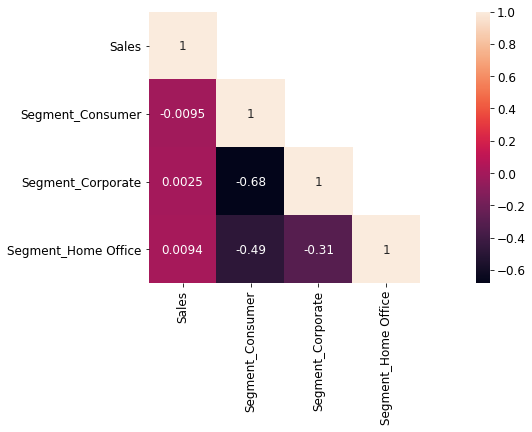

In [34]:
df1 = df[['Segment','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

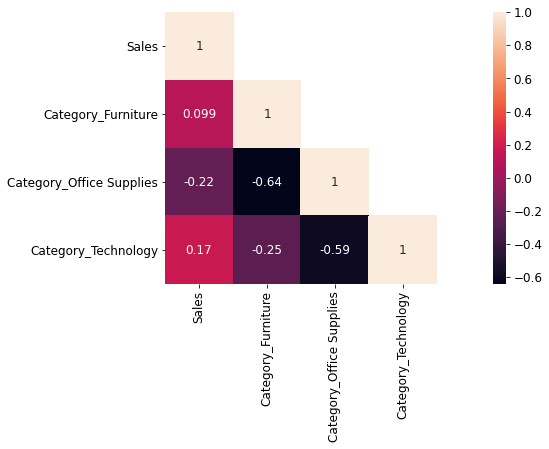

In [35]:
df1 = df[['Category','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

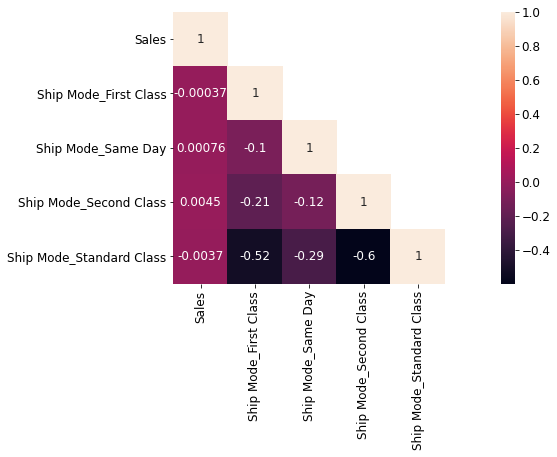

In [36]:
df1 = df[['Ship Mode','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

# 2. Time Series

In [39]:
new_data = pd.DataFrame(df['Sales'])
new_data

,Sales
Order Date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536
...,...
2018-12-30,20.720
2018-12-30,323.136
2018-12-30,209.300


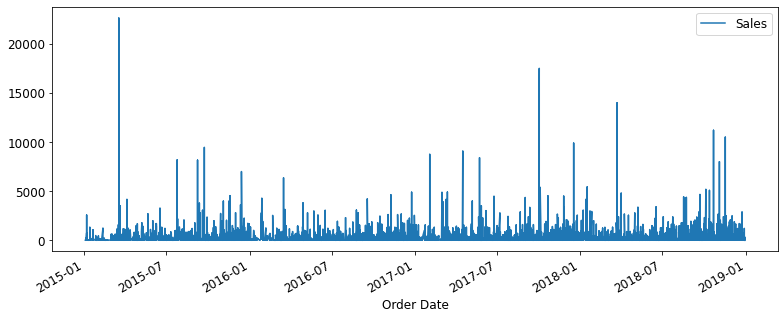

In [40]:
#Plotting the data to understand the sales distribution from the year 2015-2018
new_data.plot();

A series is said to be stationary when its mean and variance do not change over time. From the above distribution of the sales it is not clear whether the sales distribution is stationary or not. Let us perform some stationarity tests to check whether the time series is stationary or not.

In [41]:
# # Checkting for Stationarity
new_data =  pd.DataFrame(new_data['Sales'].resample('D').mean())
new_data = new_data.interpolate(method='linear') #The interpolate() function is used to interpolate values according to 
#different methods. It ignore the index and treats the values as equally spaced.

In [42]:
# Method 1
# To check for stationarity by comparing the change in mean and variance over time, let us split the data into train, test and validate.
train, test, validate = np.split(new_data['Sales'].sample(frac=1), [int(.6*len(new_data['Sales'])),int(.8*len(new_data['Sales']))])

In [43]:
mean1, mean2, mean3 = train.mean(), test.mean(), validate.mean() #taking mean of train, test and validate data
var1, var2, var3 = train.var(), test.var(), validate.var() #taking variance of train, test and validate data

print('Mean:')
print(mean1, mean2, mean3)
print('Variance:')
print(var1, var2, var3)

Mean:
216.99496982660554 229.08349491204484 232.52830763847464
Variance:
55251.27831941057 78380.79195830628 115805.27903611981


From the above values of mean and variance, it can be inferred that their is not much difference in the three values of mean and variance, indicating that the series is stationary. However, to verify our observations, let us perform a standard stationarity test, called Augmented Dicky Fuller test.

**Augmented Dicky Fuller test**

* The Augmented Dickey-Fuller test is a type of statistical test alsocalled a unit root test. The base of unit root test is that it helps in determining how strongly a time series is defined by a trend.

* The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary. The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

1. Null Hypothesis(H0): Time series is not stationary
2. Alternate Hypothesis (H1): Time series is stationary

* This result is interpreted using the p-value from the test.

1. p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
2. p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [44]:
# Method 2
# Augmented Dicky Fuller Test

from statsmodels.tsa.stattools import adfuller #importing adfuller tool from statsmodels
#statsmodels provide adfuller() fucntion to implement stationarity test of a time series

adf = adfuller(new_data) 

print(adf)
print('\nADF = ', str(adf[0])) #more towards negative value the better
print('\np-value = ', str(adf[1]))
print('\nCritical Values: ')

for key, val in adf[4].items(): #for loop to print the p-value (1%, 5% and 10%) and their respective values
    print(key,':',val)
    

    if adf[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary')

(-20.80945851483933, 0.0, 2, 1455, {'1%': -3.4348523191002123, '5%': -2.8635284734563364, '10%': -2.567828646449617}, 20042.15494613892)

ADF =  -20.80945851483933

p-value =  0.0

Critical Values: 
1% : -3.4348523191002123
Null Hypothesis Rejected. Time Series is Stationary
5% : -2.8635284734563364
Null Hypothesis Rejected. Time Series is Stationary
10% : -2.567828646449617
Null Hypothesis Rejected. Time Series is Stationary


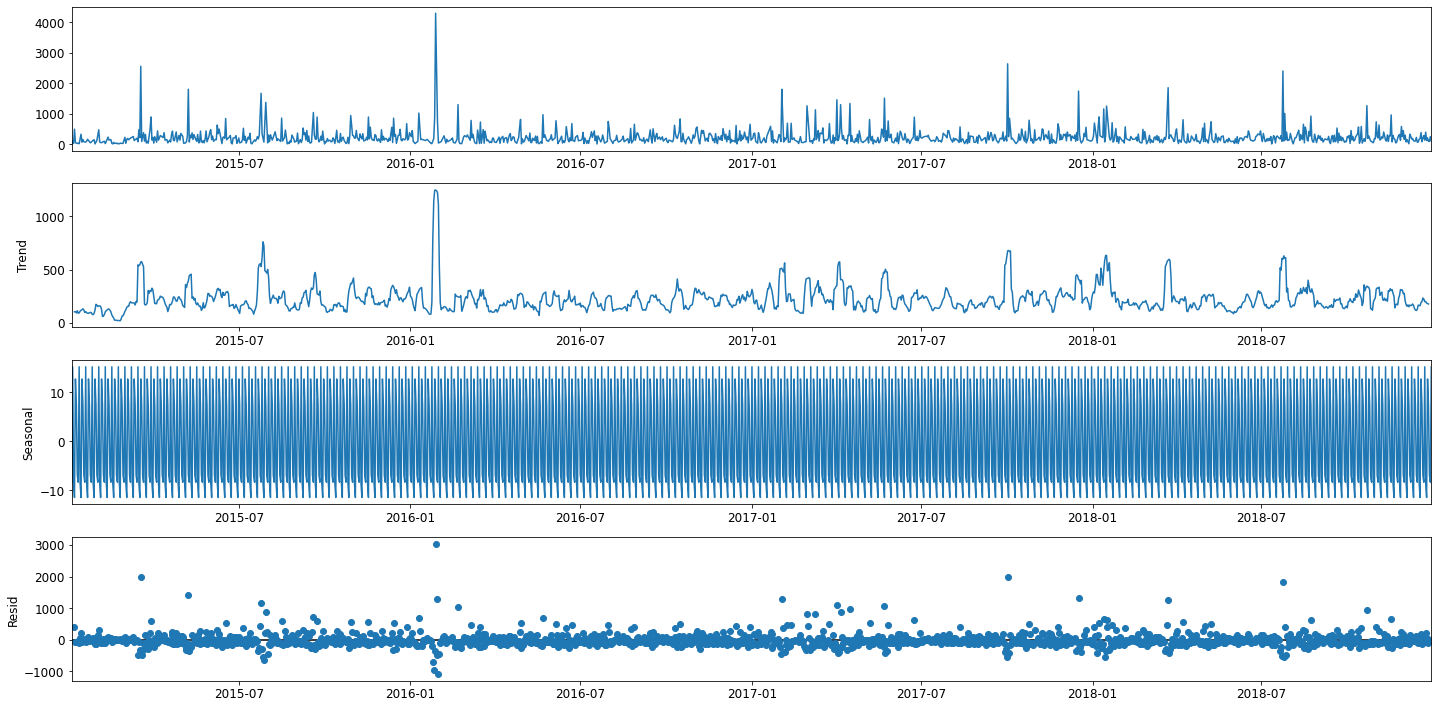

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(new_data, model='additive') #function used to decompose Time Series Data into Trend and Seasonality
fig = decomposition.plot()
plt.show();

Now that we know our time series is data is stationary. Let us begin with model training for forecasting the sales. We have chosen SARIMA model to forecast the sales.

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that supports univariate time series data with a seasonal component.

SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.

1. Trend Elements There are three trend elements that require configuration.
p: Trend autoregression order. d: Trend difference order. q: Trend moving average order.

1. Seasonal Elements There are four seasonal elements:
P: Seasonal autoregressive order. D: Seasonal difference order. Q: Seasonal moving average order. m: The number of time steps for a single seasonal period.

The notation for a SARIMA model is specified as: SARIMA(p,d,q)(P,D,Q)m

In [46]:
import itertools
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))] #for loop for creating combinations of seasonal parameters of SARIMA
print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

Examples of parameter combinations for Seasonal ARIMA:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [47]:
for parameters in pdq: #for loop for determining the best combination of seasonal parameters for SARIMA
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(new_data,
                                            order=parameters,
                                            seasonal_param_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False) #determines the AIC value of the model**
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, seasonal_param, results.aic))
        except:
            continue

# **The Akaike information criterion (AIC) is an estimator of out-of-sample prediction error and thereby relative 
# quality of statistical models for a given set of data. AIC estimates the relative amount of information lost 
# by a given model. The less information a model loses, the higher the quality of that model.  

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:20882.28406680812
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:20882.28406680812
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:20882.28406680812
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:20882.28406680812
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:20882.28406680812
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:20882.28406680812
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:20882.28406680812
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:20882.28406680812
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:21077.55722633678
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:21

In [48]:
# After choosing the combination of seasonal parameters with least AIC value, let us train the SARIMA model
mod = sm.tsa.statespace.SARIMAX(new_data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False) #model defintion
results = mod.fit() #model fitting
print(results.summary().tables[1]) # displaying the result 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2153      0.011     20.143      0.000       0.194       0.236
ma.L1         -1.0000      8.708     -0.115      0.909     -18.068      16.068
ar.S.L12      -0.0375      0.035     -1.071      0.284      -0.106       0.031
ma.S.L12      -1.0000      8.703     -0.115      0.909     -18.057      16.057
sigma2      6.918e+04      0.000   6.36e+08      0.000    6.92e+04    6.92e+04


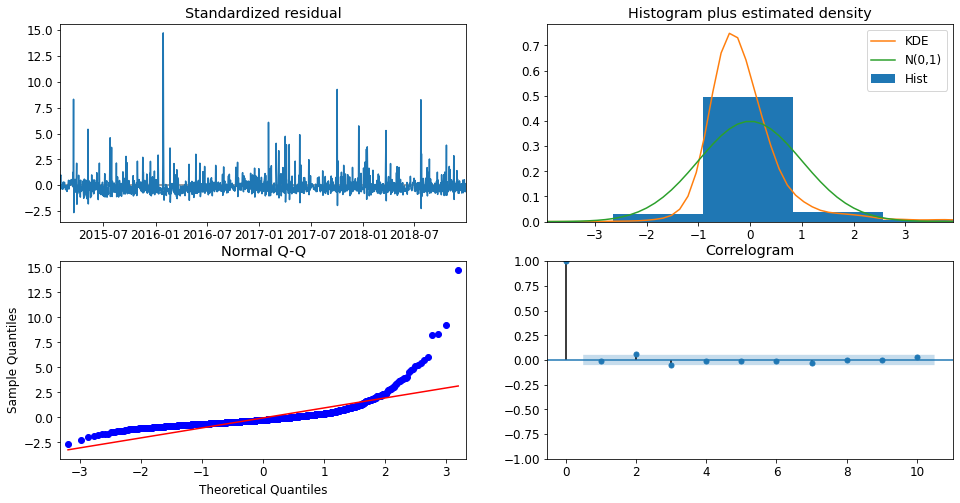

In [49]:
results.plot_diagnostics(figsize=(16, 8)) #Produces a plot grid of: 1. Standardized residuals over time 
# 2. Histogram plus estimated density of standardized residulas and along with a Normal(0,1) density plotted for reference.
# 3. Normal Q-Q plot, with Normal reference line and, 4. Correlogram.
plt.show()

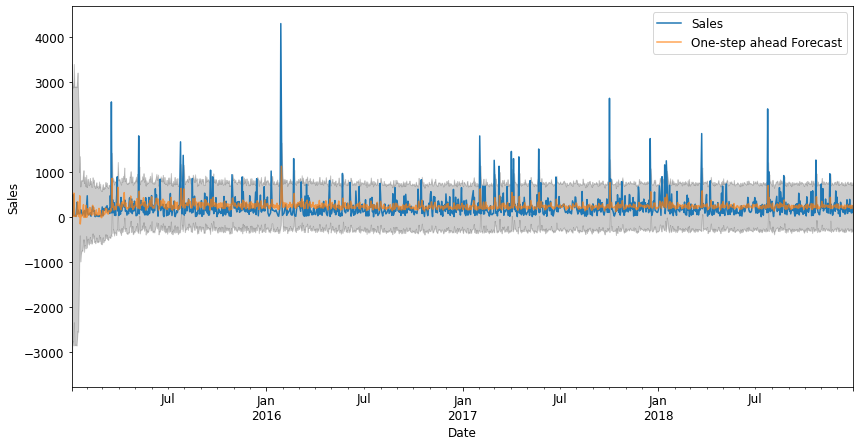

In [50]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-03'), dynamic=False) # variable to display plot for predicted values
pred_val = pred.conf_int()
ax = new_data['2014':].plot(label='observed') # displays plot for original values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7)) # displays plot for predicted values
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [51]:
y_forecasted = pred.predicted_mean
y_truth = new_data['Sales']

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_forecasted, y_truth)
rmse = sqrt(mse)
print('The Mean Squared Error of the forecasts is {}'.format(round(rmse, 2))) # displays the root mean squared error of the forecast with rounding it up to 2 decimals

The Mean Squared Error of the forecasts is 267.66


Out of Sample forecast:

To forecast sales values after some time period of the given data. In our case, we have to forecast sales with time period of 7 days.

In [52]:
# mod = sm.tsa.statespace.SARIMAX(new_data,
#                                 order=(1, 1, 1),
#                                 seasonal_order=(1, 1, 1, 12),
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False) #model defintion
# results = mod.fit() #model fitting

forecast = results.forecast(steps=7) # making a forecast of 7 days later of the last date in the 'Order Date' column
print(forecast.astype('int')) #displays the sales forecast as type integer

2018-12-31    229
2019-01-01    241
2019-01-02    244
2019-01-03    229
2019-01-04    196
2019-01-05    254
2019-01-06    223
Freq: D, dtype: int64
